In [12]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_fscore_support
%matplotlib inline

# Importing the dataset

In [13]:
# Importing examples of red wine
df_red = pd.read_csv('data/winequality-red.csv', delimiter=';')
df_red.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [14]:
# Importing examples of white wine
df_white = pd.read_csv('data/winequality-white.csv', delimiter=';')
df_white.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [15]:
# Reduce data to random samples of size N
# Can set N to whatever you want
N = 200 
df_red = df_red.sample(N)
df_white = df_white.sample(N)


In [16]:
print("Red Wine:")
display(np.round(df_red.describe()))
print("White Wine:")
display(np.round(df_white.describe()))

Red Wine:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0
mean,8.0,1.0,0.0,3.0,0.0,16.0,47.0,1.0,3.0,1.0,10.0,6.0
std,2.0,0.0,0.0,1.0,0.0,10.0,33.0,0.0,0.0,0.0,1.0,1.0
min,5.0,0.0,0.0,1.0,0.0,3.0,6.0,1.0,3.0,0.0,9.0,4.0
25%,7.0,0.0,0.0,2.0,0.0,8.0,23.0,1.0,3.0,1.0,10.0,5.0
50%,8.0,1.0,0.0,2.0,0.0,14.0,38.0,1.0,3.0,1.0,10.0,6.0
75%,9.0,1.0,0.0,3.0,0.0,22.0,62.0,1.0,3.0,1.0,11.0,6.0
max,16.0,1.0,1.0,14.0,0.0,51.0,152.0,1.0,4.0,1.0,14.0,8.0


White Wine:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0
mean,7.0,0.0,0.0,6.0,0.0,35.0,136.0,1.0,3.0,0.0,11.0,6.0
std,1.0,0.0,0.0,5.0,0.0,17.0,45.0,0.0,0.0,0.0,1.0,1.0
min,5.0,0.0,0.0,1.0,0.0,4.0,10.0,1.0,3.0,0.0,9.0,4.0
25%,6.0,0.0,0.0,2.0,0.0,23.0,105.0,1.0,3.0,0.0,10.0,5.0
50%,7.0,0.0,0.0,5.0,0.0,33.0,131.0,1.0,3.0,0.0,10.0,6.0
75%,7.0,0.0,0.0,9.0,0.0,46.0,169.0,1.0,3.0,1.0,12.0,7.0
max,14.0,1.0,1.0,18.0,0.0,86.0,245.0,1.0,4.0,1.0,14.0,8.0


In [17]:
# Get column names
column_names = list(df_red)
for i in range(len(column_names)):
    print(i, column_names[i])

0 fixed acidity
1 volatile acidity
2 citric acid
3 residual sugar
4 chlorides
5 free sulfur dioxide
6 total sulfur dioxide
7 density
8 pH
9 sulphates
10 alcohol
11 quality


In [18]:
# Add column of zeros to red wine values
# TODO: combine all of white and red into one DF with a new column "red" = 1, 0
red = df_red.values
#print(red[:1, :])
zeros = np.zeros((red.shape[0], 1))
red = np.hstack((red, zeros))
#print(red[:1, :])

In [19]:
# Add column of ones to white wine values
white = df_white.values
ones = np.ones((white.shape[0], 1))
white = np.hstack((white, ones))
#print(white[:1, :])

# Unsupervised Analysis

## Plotting all attributes against quality

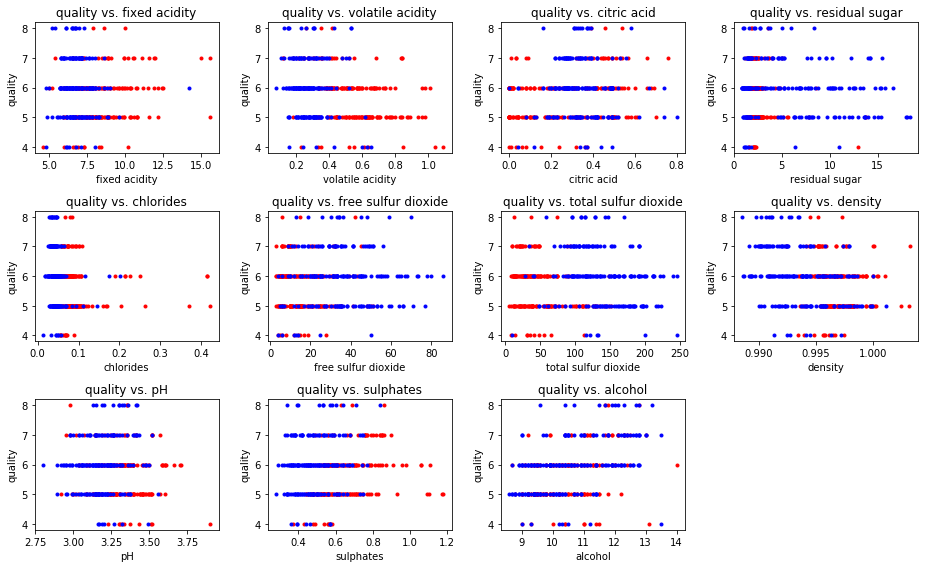

In [20]:
# Plotting all against quality

quality_index = 11

# figsize=(width, height)
plt.figure(figsize=(13, 8))

for i in range(len(column_names)):
    if i != quality_index:
        plt.subplot(3, 4, i+1)
        x_label = column_names[i]
        y_label = column_names[quality_index]
        plt.plot(red[:, i], red[:, quality_index], 'r.')
        plt.plot(white[:, i], white[:, quality_index], 'b.')
        plt.title(y_label + " vs. " + x_label)
        plt.xlabel(x_label)
        plt.ylabel(y_label)

plt.tight_layout()
plt.show()

## Plotting all attributes against alcohol

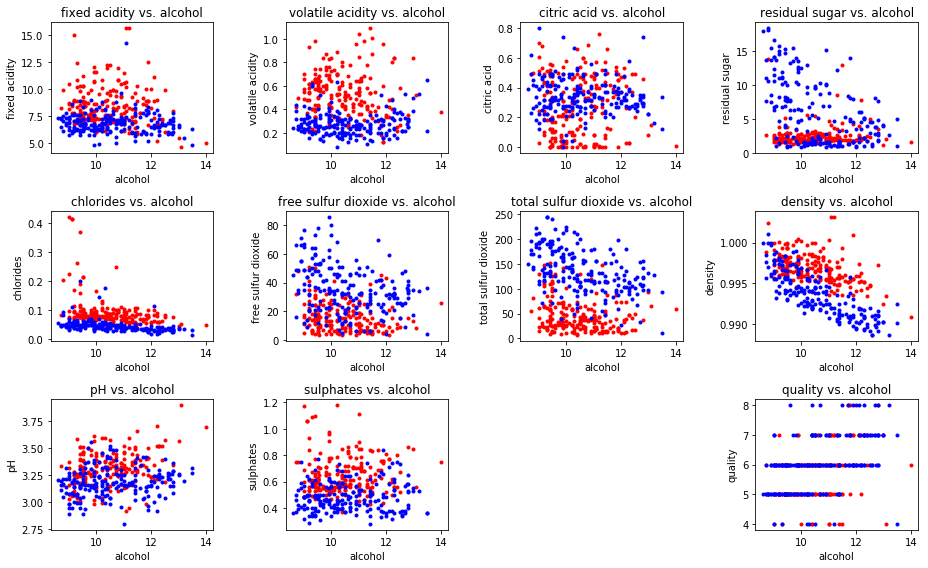

In [21]:
# Plotting all against alcohol

alcohol_index = 10

# figsize=(width, height)
plt.figure(figsize=(13, 8))

for i in range(len(column_names)):
    if i != alcohol_index:
        plt.subplot(3, 4, i+1)
        x_label = column_names[alcohol_index]
        y_label = column_names[i]
        plt.plot(red[:, alcohol_index], red[:, i], 'r.')
        plt.plot(white[:, alcohol_index], white[:, i], 'b.')
        plt.title(y_label + " vs. " + x_label)
        plt.xlabel(x_label)
        plt.ylabel(y_label)

plt.tight_layout()
plt.show()

# Supervised Analysis

## Predicting wine type using Logistic Regression

### Data Preprocessing

In [22]:
# Separate y's from red
red_y = red[:, -1]
red_y = np.reshape(red_y, (len(red_y), 1))
red_x = red[:, :-1]
# Separate y's from white
white_y = white[:, -1]
white_y = np.reshape(white_y, (len(white_y), 1))
white_x = white[:, :-1]

# print("red-y shape:", red_y.shape)
# print("white-y shape", white_y.shape)
# Combine red and white data into a single matrix
x = np.vstack((red_x, white_x))
# Scale x data
x_scale = preprocessing.scale(x)

# Combine y's from red and white into a single vector
y = np.vstack((red_y, white_y))

# print("X shape:", x_scale.shape)
# print("y shape:", y.shape)
# print(x_scale[:6, :])
# print(y[:6, :])

# Splitting data into training and test data

x_train, x_test, y_train, y_test = train_test_split(x_scale, y)
print(x_train.shape)
print(y_train.shape)



(300, 12)
(300, 1)


### Using Logistic Regression

In [23]:
# Initializing logistic regression model
# C is 1/lambda. So, for now, use a high value for C, so lambda is nearly 0
c = 100000000
logreg = LogisticRegression(C=c)
# Fixing dimensions of y_train
y_train = np.reshape(y_train, (len(y_train), ))
# Fitting logistic regression model to training data
logreg.fit(x_train, y_train)

LogisticRegression(C=100000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [29]:
# Getting predictions of training data
y_hat = logreg.predict(x_test)
# Getting accuracy of model
acc = logreg.score(x_test, y_test) # I think this needs to be x_test/ y_test
print("Accuracy:", acc)

Accuracy: 0.98


In [30]:
# Getting coefficients and w0
w = logreg.coef_
w0 = logreg.intercept_
print("W:", w)
print("w0", w0)

W: [[ -9.03505168 -14.86616414   3.55097587   7.89972485 -19.30215579
   11.83139203   4.71405753 -28.9251802    0.14003055 -18.33186936
  -10.3508845   -4.62941408]]
w0 [-17.61118176]


In [32]:
# Find Precision, recall and fscore using precision_recall_fscore_support nethod of sklearn.
prec , recal , fscore,_ = precision_recall_fscore_support(y_test, y_hat)
print(prec)
print(recal)
print(fscore)

[0.98113208 0.9787234 ]
[0.98113208 0.9787234 ]
[0.98113208 0.9787234 ]
